In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))
import time

TensorFlow version: 2.0.0
Eager execution: True


In [2]:
def bucketify(data, no_of_buckets, reduce_function):
    bucket_size = len(data) // no_of_buckets

    tmp = [[] for i in range(no_of_buckets)]

    j = 0
    for i in range(no_of_buckets):
        for _ in range(bucket_size):
            tmp[i].append(data[j])
            j += 1

    return [reduce_function(i) for i in tmp]

In [3]:
def loss(model, inputs, targets, loss_func):
    predictions = model(tf.constant(inputs))
    return loss_func(y_pred=predictions, y_true=targets)

def grad(model, inputs, targets, loss_func):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, loss_func)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

def train(model, dataset, epoches_no, optimiser, loss_func, train_loss_results=[]):
    for epoch_no in range(epoches_no):
#         if epoch_no==0:
#         print("Epoch number: ")
#         print(f"{epoch_no}", end=" ")
#         counter = 0
        for x, y in dataset:
#             if counter==0:
#                 print("\nminibatch number: ")
#             print(f"{counter}", end=" ")
#             counter +=1
            start = time.time()
            features = np.array([x])
            labels = np.array([y])
            dataset_x = np.array([features])
            dataset_y = np.array([labels])
            end = time.time()
#             print(f"zero sekónd: {end-start}")
            start = time.time()
            loss_value, grads = grad(model, dataset_x, dataset_y, loss_func)
            end = time.time()
#             print(f"grad: {end-start}")
            start = time.time()
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
            end = time.time()
#             print(f"apply grad: {end-start}")
            train_loss_results.append(loss_value)

Wall time: 1min 58s


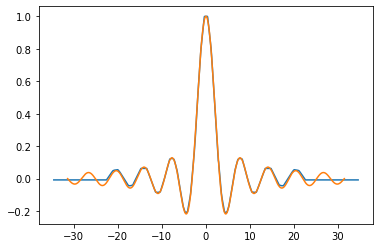

In [4]:
EXAMPLES_NO = 1000
EPOCHES_NO = 1000
MINI_BATCH_NO = 100
LEARNING_RATE = 0.005
DECAY_RATE = LEARNING_RATE/EPOCHES_NO
BATCH_SIZE = EXAMPLES_NO // MINI_BATCH_NO

# DATASET
RANGE = 5
RANGE_UNIT = 2*np.pi
EXPANSION = 1.1
X = np.linspace(-RANGE*RANGE_UNIT, RANGE*RANGE_UNIT, EXAMPLES_NO).reshape(-1,1)
X_expanded = np.linspace(-RANGE*RANGE_UNIT*EXPANSION, RANGE*RANGE_UNIT*EXPANSION, EXAMPLES_NO)
Y = np.sin(X)/X
X = np.array(X, dtype=np.float32)
Y = np.array(Y, dtype=np.float32)
dataset = tf.data.Dataset.from_tensor_slices((X, Y)).batch(EXAMPLES_NO//MINI_BATCH_NO)

# MODEL
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation='linear')
])

# OPTIMISER
optimizer = tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE, decay=DECAY_RATE, momentum=0.1)

# LOSS
loss_func = tf.keras.losses.mean_squared_error

# # CLASSICAL TRAINING

model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])
%time model.fit(X, Y, batch_size=BATCH_SIZE, epochs=EPOCHES_NO, verbose=0)

# # # RL TRAINING
# %time train(model, dataset, EPOCHES_NO, optimizer, loss_func)

# VISUALIZATION
predictions = model.predict(X_expanded)
plt.plot(X_expanded, predictions)
plt.plot(X,Y)